In [1]:
import pandas as pd 
import numpy as np
import nltk

In [3]:
df=pd.read_csv('final_cleaned_processed.csv')
df.shape

(220378, 4)

In [300]:
dis_uniq = df['relevance'].unique()
print('not disaster: ', dis_uniq[0])
print('disaster: ', dis_uniq[1])
df['type_of_disaster'] = df['type_of_disaster'].str.lower()

not disaster:  0.0
disaster:  1.0


In [301]:
filtered_rows = df[df['tweets'].isnull()==True]
print(filtered_rows)

       tweets type_of_disaster  relevance hashtags
13065     NaN        meteorite        1.0      NaN
13076     NaN     non-disaster        0.0      NaN
13081     NaN        meteorite        1.0      NaN
13082     NaN        meteorite        1.0      NaN
13112     NaN        meteorite        1.0      NaN
...       ...              ...        ...      ...
149910    NaN     not disaster        0.0      NaN
150668    NaN     not disaster        0.0      NaN
150953    NaN     not disaster        0.0      NaN
151108    NaN     not disaster        0.0      NaN
151225    NaN     not disaster        0.0      NaN

[453 rows x 4 columns]


## General EDA


<AxesSubplot:xlabel='relevance', ylabel='count'>

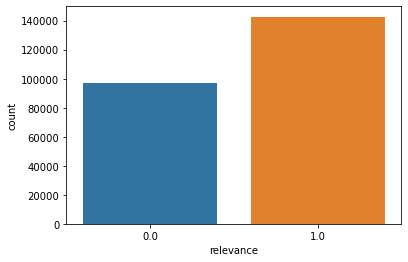

In [302]:
import seaborn as sns
label_mapping = {
    'wildfire': 'wildfires',
    'non-disaster': 'not disaster',
     'dorian': 'hurricane',
    'matthew': 'hurricane',
     'michael': 'hurricane',
    'sandy': 'hurricane',
    'fire': 'wildfires'
    
}

# Replace variations with the common label in the 'type_of_disaster' column
df['type_of_disaster'] = df['type_of_disaster'].replace(label_mapping)

# Print the updated DataFrame

sns.countplot(x='relevance',data=df)

In [303]:
dis_uniq1 = df['type_of_disaster'].unique()
for i in range(len(dis_uniq1)):
    print(dis_uniq1[i])

not disaster
wildfires
earthquake
floods
typhoon
meteorite
collapse
haze
hurricane
tornado
flood
meteor
nan
blizzard
volcano
pandemic
cyclone


[Text(0, 0, 'not disaster'),
 Text(1, 0, 'wildfires'),
 Text(2, 0, 'earthquake'),
 Text(3, 0, 'floods'),
 Text(4, 0, 'typhoon'),
 Text(5, 0, 'meteorite'),
 Text(6, 0, 'collapse'),
 Text(7, 0, 'haze'),
 Text(8, 0, 'hurricane'),
 Text(9, 0, 'tornado'),
 Text(10, 0, 'flood'),
 Text(11, 0, 'meteor'),
 Text(12, 0, 'blizzard'),
 Text(13, 0, 'volcano'),
 Text(14, 0, 'pandemic'),
 Text(15, 0, 'cyclone')]

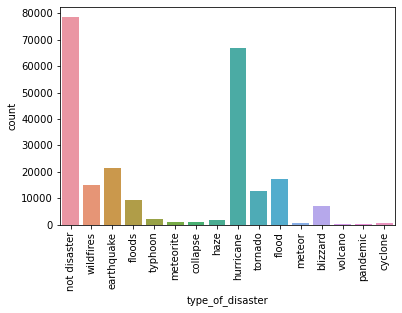

In [304]:
ax=sns.countplot(x='type_of_disaster',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) #shows that data is imbalanced if we were to classify subtype of disaster

In [305]:
print(df['tweets'].isnull().sum())

453


In [306]:
print(df['type_of_disaster'].isnull().sum())

8878


In [307]:
 nan_df=df[df['type_of_disaster'].isnull()==True]
nan_df
file_path = 'temp.csv'
nan_df.to_csv(file_path, index=False)

In [308]:
indexnan =df[df['type_of_disaster'].isnull()==True].index
df.drop(indexnan , inplace=True)
df.shape

(234937, 4)

In [309]:
new_df=pd.read_csv('temp.csv')

In [310]:
disaster_keywords = ['earthquake', 'flood', 'tsunami', 'tornado', 'hurricane', 'wildfire', 'forest fire', 'fire', 'drought', 'landslide', 'volcano', 'storm', 
                     'blizzard', 'heat wave', 'avalanche', 'cyclone', 'volcanic eruption', 'thunderstorm', 'hailstorm', 'winter storm', 'climate change', 
                     'violent storm', 'duct storm', 'rainstorm','meteor']

In [311]:
def disaster_type(a_list):
    disaster_word_list = []
    
    for disaster_word in disaster_keywords:
        if disaster_word in a_list:
            disaster_word_list.append(disaster_word)
    
    if len(disaster_word_list) == 0: 
        return 'not disaster'
    else: 
        return disaster_word_list[0]


In [312]:
new_df.head()

,tweets,type_of_disaster,relevance,hashtags
0,russian meteor pieces number crumb boss tv all...,NaN,NaN,NaN
1,with my love of my life my bride on the eve of...,NaN,0.0,NaN
2,time for us to sta getting ready for hurricane...,NaN,0.0,NaN
3,all fast food restaurants after hurricane matt...,NaN,0.0,NaN
4,make sure and prepare for hurricane matthew wi...,NaN,0.0,['freshcatchtci']


In [313]:
new_df['type_of_disaster'] = new_df['tweets'].apply(disaster_type)

In [314]:
new_df['relevance'].isnull().sum()
new_df.shape

(8878, 4)

In [315]:
def assign_relevance(text):
    # Convert the text to lowercase for case-insensitive matching
    text = text.lower()
    
    # Check if any word in disaster_keywords is present in the text
    for word in disaster_keywords:
        if word in text:
            return 1.0  # If any word is found, assign relevance as 1.0
    
    return 0.0  # If no word is found, assign relevance as 0.0


In [316]:
# Apply the assign_relevance function to create a 'relevance' column
new_df['relevance'] = new_df['tweets'].apply(assign_relevance)


In [317]:
df = pd.concat([df, new_df], ignore_index=True)
df.shape

(243815, 4)

In [318]:
listy=new_df['type_of_disaster'].unique()
print(listy)

['meteor' 'hurricane' 'flood' 'tornado' 'not disaster' 'blizzard' 'storm'
 'fire' 'wildfire']


In [319]:
df['tweets'].isnull().sum()

453

In [320]:
indices_to_drop = df[df['tweets'].isnull()==True].index

# Drop rows by indices in-place
df.drop(indices_to_drop, inplace=True)
print(df.shape)

(243362, 4)


Class Hurricane is having way too many duplicates : we decide to keep just the first occurence

In [5]:
class_df = df[df['type_of_disaster'] == 'not disaster']
duplicate = class_df[class_df.duplicated()]
 
print("Duplicate Rows for not disaster :")
 

duplicate

Duplicate Rows for not disaster :


,tweets,type_of_disaster,relevance,hashtags
1095,colorado springs,not disaster,0.0,NaN
1132,gameofthrones happy thofjuly to all the gotfan...,not disaster,1.0,"['gotfans', 'wildfire']"
1715,eahquake,not disaster,0.0,['earthquake']
1996,zishin m km eahquake,not disaster,0.0,['earthquake']
2015,eahquake m virgin islands region september gmt,not disaster,0.0,['earthquake']
...,...,...,...,...
137872,livingsafely nws issues severe thunderstorm wa...,not disaster,1.0,NaN
137876,evacuation order lifted for town of roosevelt ...,not disaster,0.0,NaN
137880,breaking la refugio oil spill may have been co...,not disaster,0.0,NaN
137892,police investigating after an e bike collided ...,not disaster,0.0,NaN


In [6]:
class_df = df[df['type_of_disaster'] == 'not disaster']
file_path = 'temp2.csv'
class_df.to_csv(file_path, index=False)

In [7]:
newest_df=pd.read_csv('temp2.csv')
newest_df

,tweets,type_of_disaster,relevance,hashtags
0,intern us tattoo wisconsin ohio nc pa florida ...,not disaster,0.0,"['intern', 'us', 'tattoo', 'wisconsin', 'ohio'..."
1,jack ward get in on the fun every thursday wit...,not disaster,0.0,"['funbrief', 'cosprings', 'colorado']"
2,welcome to our newest studentathlete reagan bi...,not disaster,0.0,NaN
3,denver post colorado governor signs bill creat...,not disaster,0.0,"['colorado', 'opengov']"
4,pretty sure i m going to live in manitou sprin...,not disaster,0.0,['theplan']
...,...,...,...,...
78070,how the granddaddy of them all of food trucks ...,not disaster,0.0,NaN
78071,thanky you sissy celebration of bihday with be...,not disaster,0.0,NaN
78072,the food is very sweet the food is not sweet,not disaster,0.0,NaN
78073,the police car that lives on my street got pro...,not disaster,0.0,NaN


In [8]:
indexnan =df[df['type_of_disaster'] == 'not disaster'].index
df.drop(indexnan , inplace=True)
df.shape

(142303, 4)

In [9]:
newest_df = newest_df.drop_duplicates(keep='first')

# Reset the index if needed
newest_df = newest_df.reset_index(drop=True)
newest_df.shape

(75075, 4)

In [10]:

file_path = 'temp_df2.csv'
df.to_csv(file_path, index=False)

In [11]:
result_df = pd.concat([df.reset_index(drop=True), newest_df.reset_index(drop=True)], axis=0)
result_df.shape

(217378, 4)

In [12]:

file_path = 'final_cleaned_processed.csv'
result_df.to_csv(file_path, index=False)

since Hurricane is majority class in type of disaster for a disaster. I would remove just its duplicates for now to create a mor e balanced class

we will handle the class imbalance later during modelling

In [21]:
df=pd.read_csv('final_cleaned_processed.csv')
df.shape

(217378, 4)

In [16]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [23]:
class_df = df[df['type_of_disaster'] == 'not disaster']
file_path = 'not_disaster.csv'
class_df.to_csv(file_path, index=False)

In [30]:
newest_df=pd.read_csv('not_disaster.csv')
newest_df

,tweets,type_of_disaster,relevance,hashtags
0,intern us tattoo wisconsin ohio nc pa florida ...,not disaster,0.0,"['intern', 'us', 'tattoo', 'wisconsin', 'ohio'..."
1,jack ward get in on the fun every thursday wit...,not disaster,0.0,"['funbrief', 'cosprings', 'colorado']"
2,welcome to our newest studentathlete reagan bi...,not disaster,0.0,NaN
3,denver post colorado governor signs bill creat...,not disaster,0.0,"['colorado', 'opengov']"
4,pretty sure i m going to live in manitou sprin...,not disaster,0.0,['theplan']
...,...,...,...,...
75070,how the granddaddy of them all of food trucks ...,not disaster,0.0,NaN
75071,thanky you sissy celebration of bihday with be...,not disaster,0.0,NaN
75072,the food is very sweet the food is not sweet,not disaster,0.0,NaN
75073,the police car that lives on my street got pro...,not disaster,0.0,NaN


In [32]:
indexnan =df[df['type_of_disaster'] == 'not disaster'].index
df.drop(indexnan , inplace=True)
df.shape

(142303, 4)

In [29]:
from textblob import TextBlob
newest_df['tweets']=newest_df['tweets'].apply(lambda x:str(TextBlob(x).correct()))



KeyboardInterrupt: 

In [ ]:
from spellchecker import SpellChecker

# Initialize the spell checker
spell = SpellChecker()

# Define a function to correct spelling in a single text
def correct_spelling(text):
    words = text.split()
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
    corrected_text = " ".join(corrected_words)
    return corrected_text

# Assuming you have a DataFrame named newest_df with a 'tweets' column
newest_df['tweets'] = newest_df['tweets'].apply(lambda x: correct_spelling(str(x)))






In [ ]:
class_df = df[df['type_of_disaster'] == 'not disaster']
duplicate = class_df[class_df.duplicated()]
 
print("Duplicate Rows for not disaster :")
 

duplicate